In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
plt.rcParams["figure.figsize"] = (12, 6)

In [11]:
csv_path = "/kaggle/input/happiness-report/World-happiness-report-updated_2024.csv"

# Try ISO-8859-1 (most common for European accented characters)
try:
    df = pd.read_csv(csv_path, encoding="ISO-8859-1")
    print("Loaded with ISO-8859-1")
except:
    print("ISO-8859-1 failed")

# If not loaded yet, try Latin1
try:
    df = pd.read_csv(csv_path, encoding="latin1")
    print("Loaded with latin1")
except:
    print("latin1 failed")

# If still fails, try cp1252
try:
    df = pd.read_csv(csv_path, encoding="cp1252")
    print("Loaded with cp1252")
except:
    print("cp1252 failed")

df.head()

Loaded with ISO-8859-1
Loaded with latin1
Loaded with cp1252


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [12]:
df = df.rename(columns={
    "Country name": "country",
    "year": "year",
    "Life Ladder": "life_ladder",
    "Log GDP per capita": "log_gdp_per_capita",
    "Social support": "social_support",
    "Healthy life expectancy at birth": "healthy_life_expectancy",
    "Freedom to make life choices": "freedom",
    "Generosity": "generosity",
    "Perceptions of corruption": "perceptions_of_corruption",
    "Positive affect": "positive_affect"
})

print("\nRenamed columns:")
print(df.columns)



Renamed columns:
Index(['country', 'year', 'life_ladder', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy', 'freedom', 'generosity',
       'perceptions_of_corruption', 'positive_affect', 'Negative affect'],
      dtype='object')


In [13]:
# Data Cleaning


In [14]:
# Drop rows with missing life_ladder (main happiness measure)
df = df.dropna(subset=["life_ladder"])

# Ensure year is integer
df["year"] = df["year"].astype(int)

print("\nData info after cleaning:")
print(df.info())


Data info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    2363 non-null   object 
 1   year                       2363 non-null   int64  
 2   life_ladder                2363 non-null   float64
 3   log_gdp_per_capita         2335 non-null   float64
 4   social_support             2350 non-null   float64
 5   healthy_life_expectancy    2300 non-null   float64
 6   freedom                    2327 non-null   float64
 7   generosity                 2282 non-null   float64
 8   perceptions_of_corruption  2238 non-null   float64
 9   positive_affect            2339 non-null   float64
 10  Negative affect            2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB
None


In [15]:
# Global trend of happiness over time

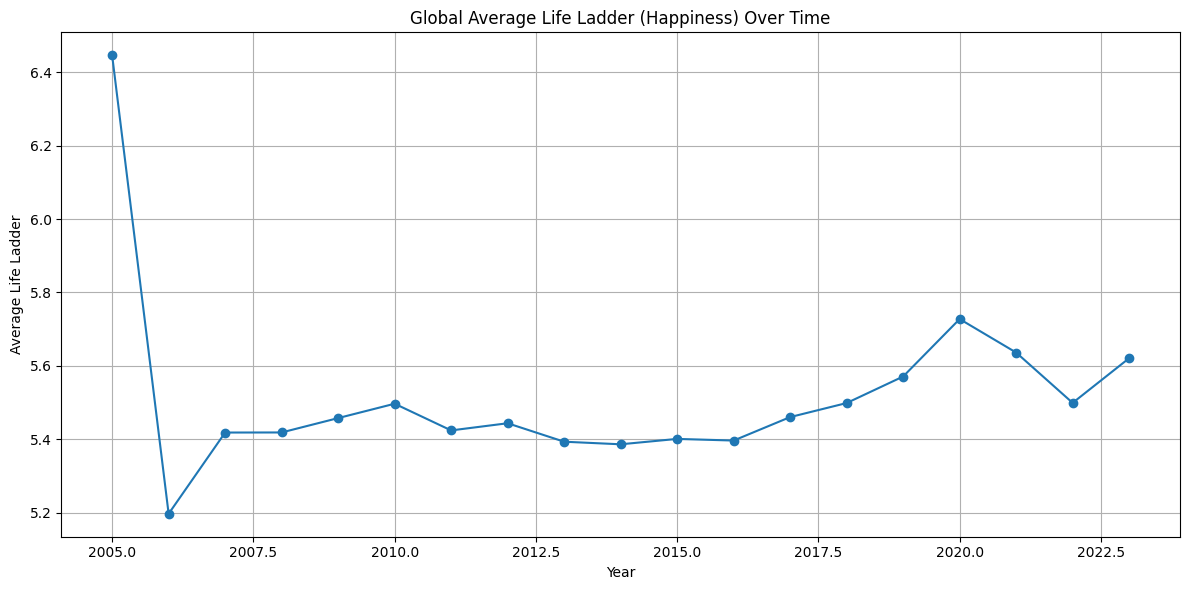

In [16]:
global_trend = df.groupby("year")["life_ladder"].mean().reset_index()

plt.figure()
plt.plot(global_trend["year"], global_trend["life_ladder"], marker="o")
plt.title("Global Average Life Ladder (Happiness) Over Time")
plt.xlabel("Year")
plt.ylabel("Average Life Ladder")
plt.grid(True)
plt.tight_layout()
plt.savefig("global_life_ladder_trend.png", dpi=300)
plt.show()

In [17]:
# Top 10 happiest countries in the latest year

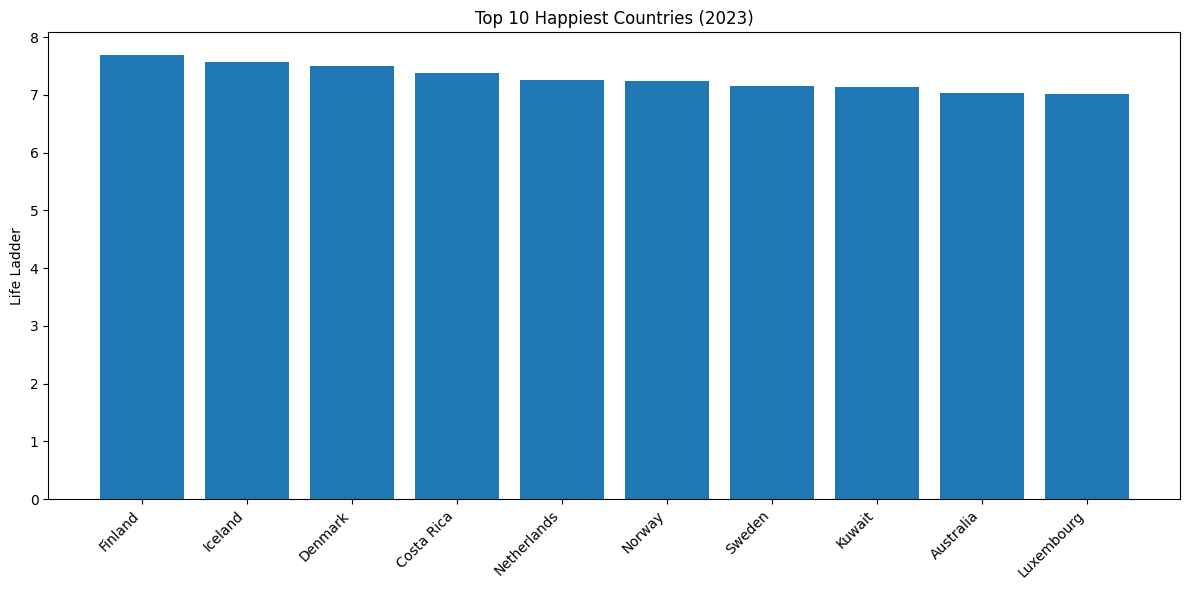

In [18]:
latest_year = df["year"].max()
df_latest = df[df["year"] == latest_year].copy()

df_latest_sorted = df_latest.sort_values("life_ladder", ascending=False)
top10_latest = df_latest_sorted.head(10)

plt.figure()
plt.bar(top10_latest["country"], top10_latest["life_ladder"])
plt.title(f"Top 10 Happiest Countries ({latest_year})")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Life Ladder")
plt.tight_layout()
plt.savefig("top10_happiest_latest_year.png", dpi=300)
plt.show()

In [19]:
# Bottom 10 countries in the latest year

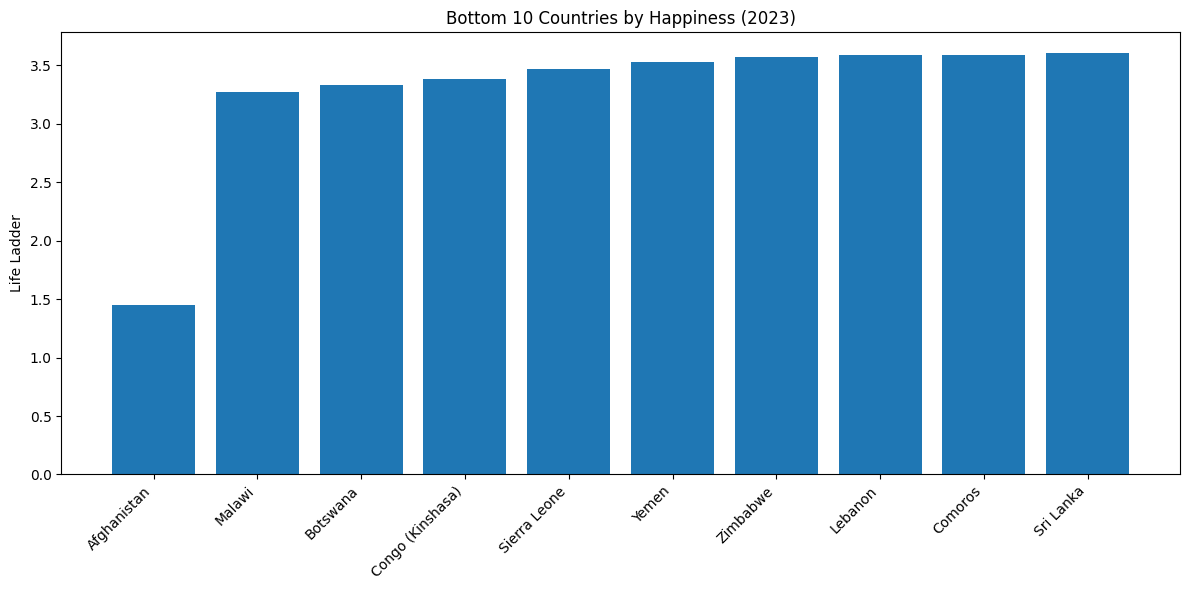

In [20]:
bottom10_latest = df_latest_sorted.tail(10).sort_values("life_ladder")

plt.figure()
plt.bar(bottom10_latest["country"], bottom10_latest["life_ladder"])
plt.title(f"Bottom 10 Countries by Happiness ({latest_year})")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Life Ladder")
plt.tight_layout()
plt.savefig("bottom10_happiest_latest_year.png", dpi=300)
plt.show()

In [21]:
# Compare earliest vs latest year for same countries

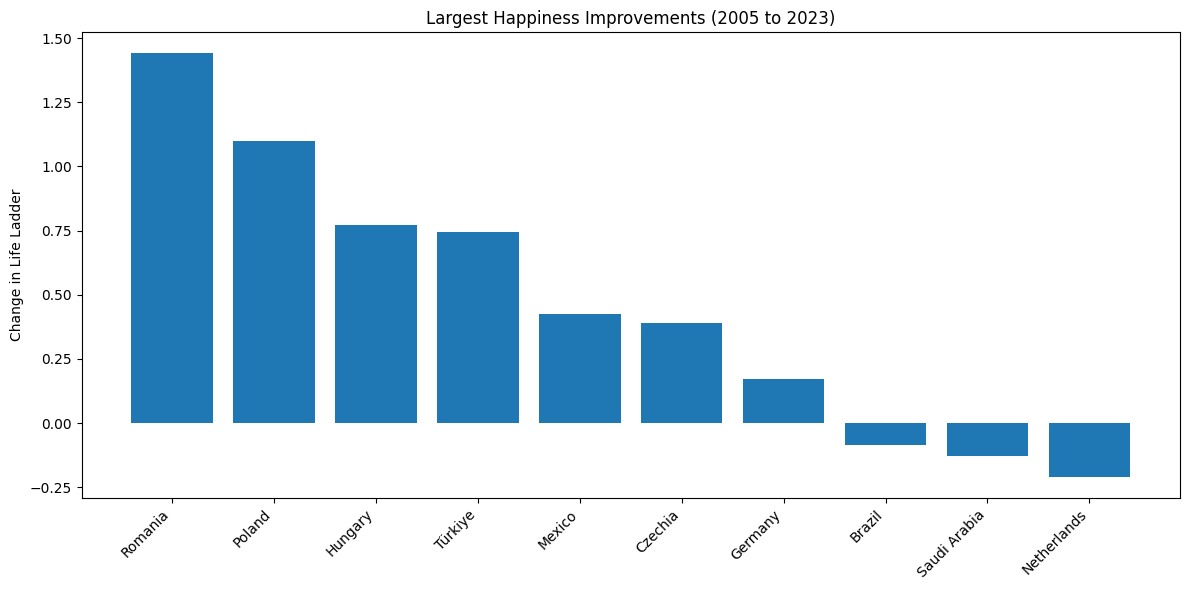

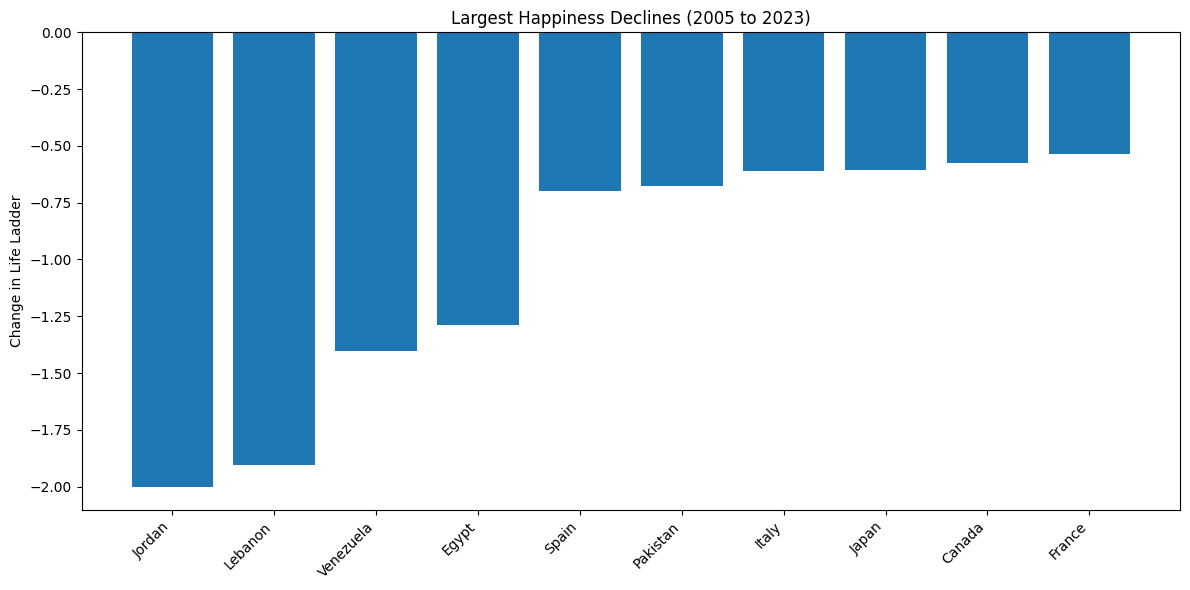

In [22]:
earliest_year = df["year"].min()
df_compare = df[df["year"].isin([earliest_year, latest_year])].copy()

pivot_compare = df_compare.pivot(index="country", columns="year", values="life_ladder")

# Drop countries that don't have both years
pivot_compare = pivot_compare.dropna(subset=[earliest_year, latest_year])

pivot_compare["change"] = pivot_compare[latest_year] - pivot_compare[earliest_year]

# Largest improvements
largest_improvements = pivot_compare.sort_values("change", ascending=False).head(10)

plt.figure()
plt.bar(largest_improvements.index, largest_improvements["change"])
plt.title(f"Largest Happiness Improvements ({earliest_year} to {latest_year})")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Change in Life Ladder")
plt.tight_layout()
plt.savefig("largest_improvements_earliest_to_latest.png", dpi=300)
plt.show()

# Largest declines (optional)
largest_declines = pivot_compare.sort_values("change", ascending=True).head(10)

plt.figure()
plt.bar(largest_declines.index, largest_declines["change"])
plt.title(f"Largest Happiness Declines ({earliest_year} to {latest_year})")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Change in Life Ladder")
plt.tight_layout()
plt.savefig("largest_declines_earliest_to_latest.png", dpi=300)
plt.show()

In [23]:
# Relationship: Log GDP per capita vs Life Ladder

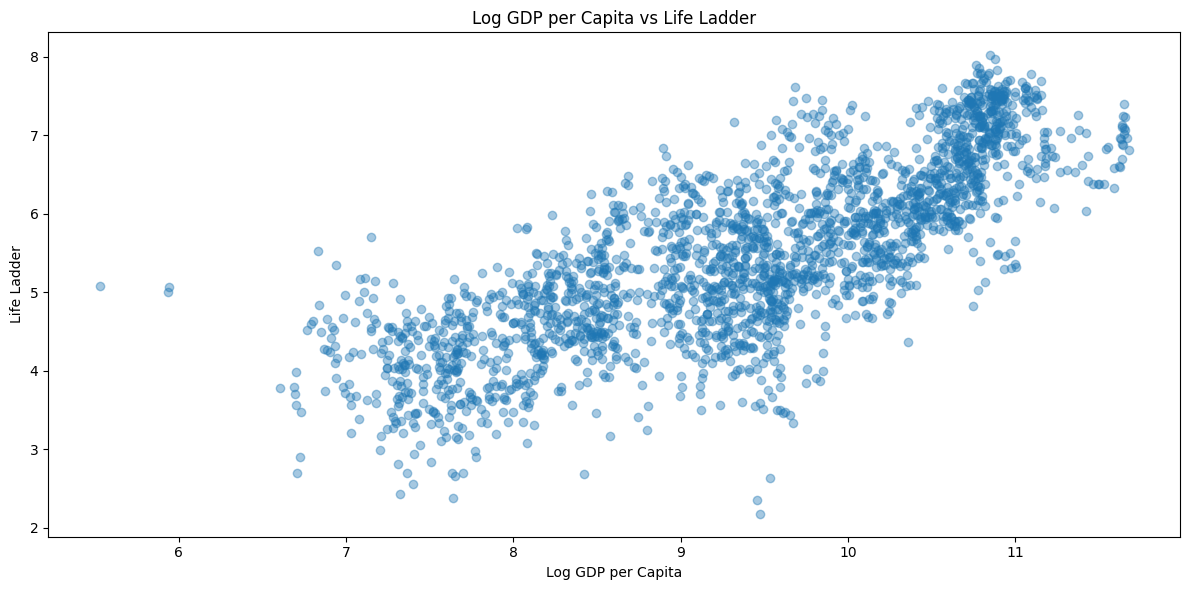

In [24]:
plt.figure()
plt.scatter(df["log_gdp_per_capita"], df["life_ladder"], alpha=0.4)
plt.title("Log GDP per Capita vs Life Ladder")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Life Ladder")
plt.tight_layout()
plt.savefig("log_gdp_vs_life_ladder.png", dpi=300)
plt.show()

In [25]:
# Relationship: Social support vs Life Ladder

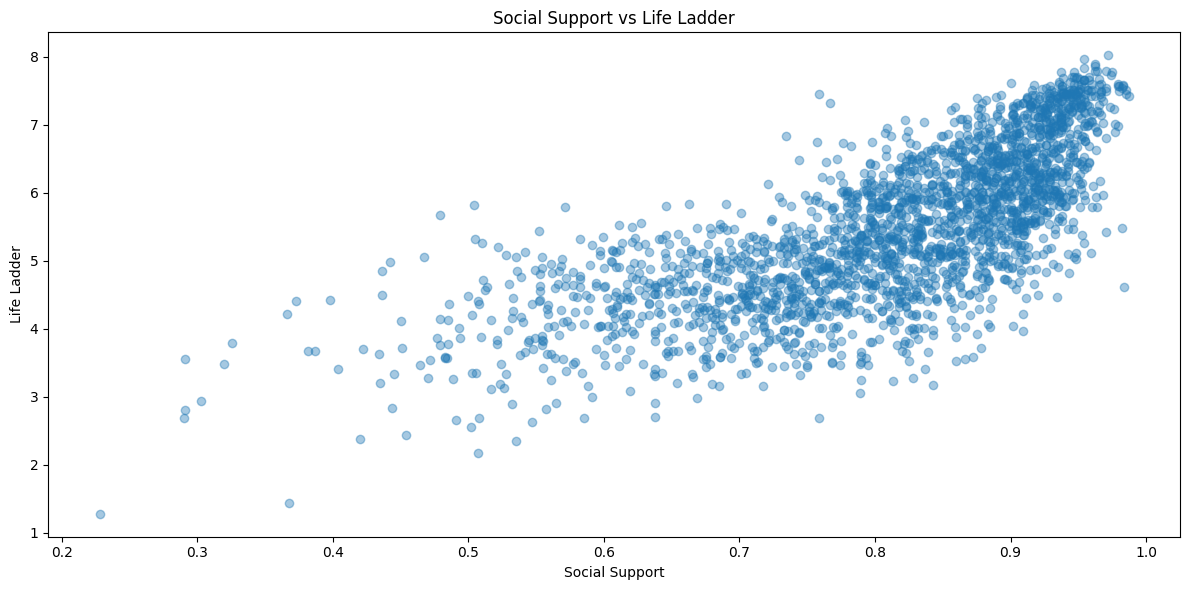

In [26]:
plt.figure()
plt.scatter(df["social_support"], df["life_ladder"], alpha=0.4)
plt.title("Social Support vs Life Ladder")
plt.xlabel("Social Support")
plt.ylabel("Life Ladder")
plt.tight_layout()
plt.savefig("social_support_vs_life_ladder.png", dpi=300)
plt.show()

In [27]:
# Correlation heatmap for key numerical features

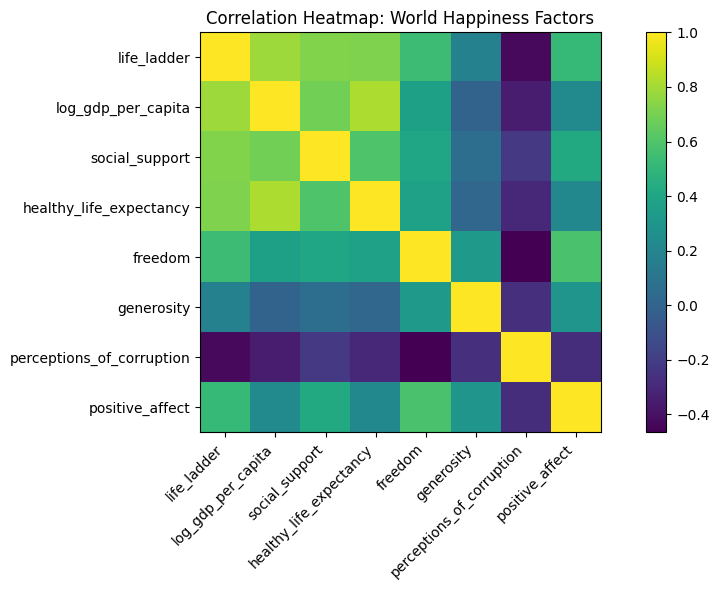

All charts saved as PNG files in the working directory.


In [28]:
numeric_cols = [
    "life_ladder",
    "log_gdp_per_capita",
    "social_support",
    "healthy_life_expectancy",
    "freedom",
    "generosity",
    "perceptions_of_corruption",
    "positive_affect"
]

corr = df[numeric_cols].corr()

plt.figure()
im = plt.imshow(corr, interpolation="nearest")
plt.title("Correlation Heatmap: World Happiness Factors")
plt.colorbar(im, fraction=0.046, pad=0.04)
ticks = np.arange(len(numeric_cols))
plt.xticks(ticks, numeric_cols, rotation=45, ha="right")
plt.yticks(ticks, numeric_cols)
plt.tight_layout()
plt.savefig("happiness_correlation_heatmap.png", dpi=300)
plt.show()

print("All charts saved as PNG files in the working directory.")

In [29]:
def summarize_happiness(df):

    # Ensure needed columns exist
    required = [
        "country","year","life_ladder","log_gdp_per_capita","social_support",
        "healthy_life_expectancy","freedom","generosity","perceptions_of_corruption"
    ]
    for col in required:
        if col not in df.columns:
            raise ValueError(f"Missing column: {col}")

    # Latest and earliest years
    latest_year = df["year"].max()
    earliest_year = df["year"].min()

    # Global trend
    global_trend = df.groupby("year")["life_ladder"].mean()
    start_value = global_trend.loc[earliest_year]
    end_value = global_trend.loc[latest_year]
    trend_change = end_value - start_value

    # Top 10 and bottom 10
    df_latest = df[df["year"] == latest_year].copy()
    happiest = df_latest.sort_values("life_ladder", ascending=False).head(10)
    least_happy = df_latest.sort_values("life_ladder").head(10)

    # Change over time (countries with both earliest + latest)
    pivot = df.pivot_table(index="country", columns="year", values="life_ladder")
    pivot = pivot.dropna(subset=[earliest_year, latest_year])
    pivot["change"] = pivot[latest_year] - pivot[earliest_year]

    improvements = pivot.sort_values("change", ascending=False).head(5)
    declines = pivot.sort_values("change").head(5)

    # Correlations
    corr = df[[
        "life_ladder","log_gdp_per_capita","social_support","healthy_life_expectancy",
        "freedom","generosity","perceptions_of_corruption"
    ]].corr()["life_ladder"].sort_values(ascending=False)

    # ---------------------------------------------------------
    # Build summary text
    # ---------------------------------------------------------

    summary = []

    summary.append(f"Global happiness has been tracked from {earliest_year} to {latest_year}. "
                   f"The average Life Ladder score increased from {start_value:.2f} to {end_value:.2f}, "
                   f"which is a change of {trend_change:.2f} points over the period.")

    summary.append(f"In {latest_year}, the happiest countries were led by {happiest.iloc[0]['country']} "
                   f"with a score of {happiest.iloc[0]['life_ladder']:.2f}. "
                   f"The top five happiest countries were: "
                   f"{', '.join(happiest['country'].head(5))}.")

    summary.append(f"In the same year, the lowest-ranking countries included {least_happy.iloc[0]['country']} "
                   f"with a Life Ladder score of only {least_happy.iloc[0]['life_ladder']:.2f}. "
                   f"Other countries in the bottom five were: "
                   f"{', '.join(least_happy['country'].head(5))}.")

    summary.append("The countries with the biggest improvements in happiness from the earliest to the latest year "
                   "were: " +
                   ", ".join([f"{idx} (+{val['change']:.2f})" 
                              for idx, val in improvements.iterrows()]) + ".")

    summary.append("The steepest declines were observed in: " +
                   ", ".join([f"{idx} ({val['change']:.2f})" 
                              for idx, val in declines.iterrows()]) + ".")

    summary.append("Looking at correlations, the strongest positive relationships with happiness were "
                   f"{corr.index[1]} ({corr.iloc[1]:.2f}), "
                   f"{corr.index[2]} ({corr.iloc[2]:.2f}), "
                   f"and {corr.index[3]} ({corr.iloc[3]:.2f}). "
                   "This suggests that economic well-being, social support, and health are major contributors "
                   "to higher Life Ladder scores.")

    summary.append("Negative correlations, such as perceptions_of_corruption, indicate that countries with lower "
                   "trust in institutions tend to report lower happiness overall.")

    return "\n\n".join(summary)


# ---------------------------------------------------------
# Run the summary generator
# ---------------------------------------------------------

summary_text = summarize_happiness(df)
print(summary_text)

Global happiness has been tracked from 2005 to 2023. The average Life Ladder score increased from 6.45 to 5.62, which is a change of -0.83 points over the period.

In 2023, the happiest countries were led by Finland with a score of 7.70. The top five happiest countries were: Finland, Iceland, Denmark, Costa Rica, Netherlands.

In the same year, the lowest-ranking countries included Afghanistan with a Life Ladder score of only 1.45. Other countries in the bottom five were: Afghanistan, Malawi, Botswana, Congo (Kinshasa), Sierra Leone.

The countries with the biggest improvements in happiness from the earliest to the latest year were: Romania (+1.44), Poland (+1.10), Hungary (+0.77), Türkiye (+0.74), Mexico (+0.42).

The steepest declines were observed in: Jordan (-2.00), Lebanon (-1.90), Venezuela (-1.41), Egypt (-1.29), Spain (-0.70).

Looking at correlations, the strongest positive relationships with happiness were log_gdp_per_capita (0.78), social_support (0.72), and healthy_life_exp